In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 150
no_epochs = 10
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.55
number_of_visualizations = 6

In [21]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = tf.keras.datasets.mnist.load_data()

# Reshape data based on channels first / channels last strategy.
# This is dependent on whether you use TF, Theano or CNTK as backend.
# Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
if tf.keras.backend.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

In [22]:
np.shape(input_train)

(60000, 28, 28, 1)

In [23]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Add noise
pure = input_train
original_test = input_test
noise = np.random.normal(0, 1, pure.shape)
noise_test = np.random.normal(0, 1, original_test.shape)
noisy_input = pure + noise_factor * noise
noisy_input_test = original_test + noise_factor * noise_test

In [24]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2DTranspose(64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 26, 26, 32)       9248      
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 28, 28, 64)       18496     
 ranspose)                                                       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 1)         577       
                                                                 
Total params: 47,425
Trainable params: 47,425
Non-trai

In [25]:
# Compile and fit data
model.compile(optimizer='adam', loss='mse')
model.fit(noisy_input, pure,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

Epoch 1/10
320/320 [==============================] - 7s 20ms/step - loss: 0.0212 - val_loss: 0.0140
Epoch 2/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0134 - val_loss: 0.0129
Epoch 3/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 4/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 5/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 6/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0119 - val_loss: 0.0119
Epoch 7/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 8/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0116 - val_loss: 0.0118
Epoch 9/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 10/10
320/320 [==============================] - 6s 19ms/step - loss: 0.0114 - val_lo

In [26]:
# Generate denoised images
samples = noisy_input_test[:number_of_visualizations]
targets = target_test[:number_of_visualizations]
denoised_images = model.predict(samples)

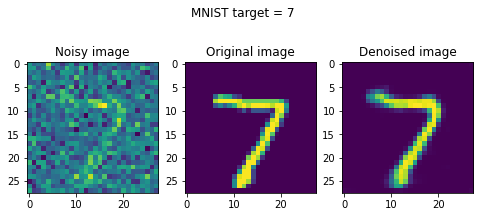

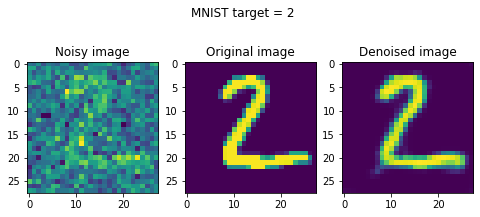

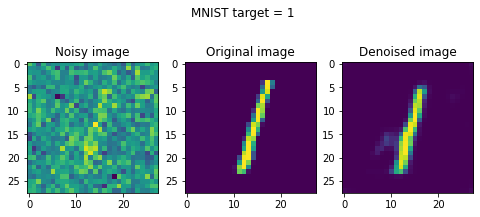

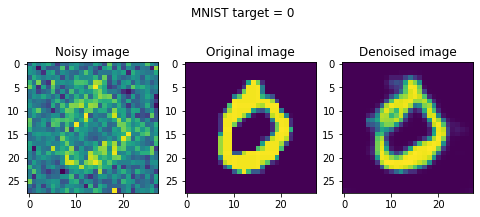

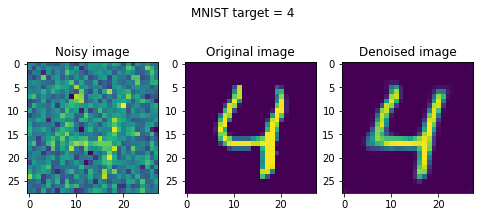

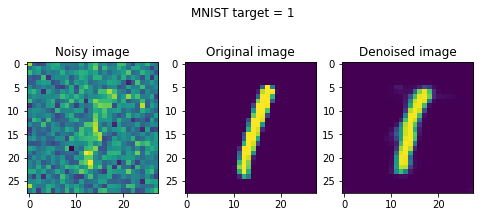

In [27]:
# Plot denoised images
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = noisy_input_test[i][:, :, 0]
  original_image  = original_test[i][:, :, 0]
  denoised_image = denoised_images[i][:, :, 0]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image)
  axes[0].set_title('Noisy image')
  axes[1].imshow(original_image)
  axes[1].set_title('Original image')
  axes[2].imshow(denoised_image)
  axes[2].set_title('Denoised image')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()